In [199]:
import pandas as pd
import ast
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
proj_git_summary = pd.read_csv('awesome_proj_data_github.csv').drop(columns = ['Unnamed: 0']).drop_duplicates(subset = 'Project', keep = 'last')
proj_git_summary.head()

,Project,Url,Number of watchers,Number of forks,Number of issues,Number of pull requests,Number of commits,Fork urls
0,MvvmCross,https://github.com/MvvmCross/MvvmCross/,272.0,1256,228.0,29.0,9185.0,"['https://github.com/MvvmCross/MvvmCross', 'ht..."
1,RawCMS,https://github.com/arduosoft/RawCMS/,12.0,58,32.0,5.0,745.0,"['https://github.com/arduosoft/RawCMS', 'https..."
2,Shouldly,https://github.com/shouldly/shouldly/,65.0,353,30.0,3.0,1211.0,"['https://github.com/shouldly/shouldly', 'http..."
3,Neovim,https://github.com/neovim/neovim/,1000.0,3042,1.0,304.0,16999.0,"['https://github.com/neovim/neovim', 'https://..."
4,grok.net,https://github.com/Marusyk/grok.net/,3.0,8,1.0,NaN,32.0,"['https://github.com/Marusyk/grok.net', 'https..."


In [91]:
proj_git_summary.shape

(208, 8)

In [143]:
# grab contributor data -- are there any similarities?
contributors = pd.read_csv('awesome_proj_data_contributors.csv').drop(columns = ['Unnamed: 0']).append(pd.read_csv('awesome_proj_data_contributors_rescrape.csv').drop(columns = ['Unnamed: 0'])).append(pd.read_csv('awesome_proj_data_contributors_rescrape2.csv').drop(columns = ['Unnamed: 0'])).drop_duplicates(subset = 'Project', keep = 'last')
contributors.head()

,Project,Contributors
0,MvvmCross,"['slodge', 'martijn00', 'Cheesebaron', 'nmilco..."
1,RawCMS,"['marcuson', 'zeppaman', 'keggyy', 'girardengo..."
2,Shouldly,"['JakeGinnivan', 'SimonCropp', 'JosephWoodward..."
3,Neovim,"['justinmk', 'janlazo', 'ZyX-I', 'tarruda', 'j..."
4,grok.net,"['Marusyk', 'Marusyk', 'Justin-Lloyd', 'iBlack..."


In [144]:
list(contributors.loc[contributors['Contributors'] == '[]']['Project'])

[]

In [145]:
contrib_list = [ast.literal_eval(i) for i in contributors['Contributors']]
contrib_list[0]

['slodge',
 'martijn00',
 'Cheesebaron',
 'nmilcoff',
 'nickrandolph',
 'MarcBruins',
 'kjeremy',
 'hollywoof',
 'Plac3hold3r',
 'tofutim',
 'mvanbeusekom',
 'lothrop',
 'heytherewill',
 'csteeg',
 'Garfield550',
 'thefex',
 'guillaume-fr',
 'vvolkgang',
 'tbalcom',
 'orzech85',
 'andres-gimenez',
 'jz5',
 'LRP-sgravel',
 'stoneman',
 'andyci',
 'spockfish',
 'danielcweber',
 'Dexyon',
 'biozal',
 'jamie94bc',
 'ehuna',
 'b099l3',
 'PeterBurke',
 'MartinZikmund',
 'steveydee82',
 'nschoenberg',
 'johnnywebb',
 'fedemkr',
 'Bowman74',
 'softlion',
 'felixfxu',
 'Stephanvs',
 'IlSocio',
 'AbdelrahmanGIT',
 'tritter',
 'prin53',
 'mellson',
 'markuspalme',
 'jamsoft',
 'dbeattie71',
 'gentledepp',
 'Prandtl',
 'MKuckert',
 'Laumania',
 'Giorgi',
 'DaRosenberg',
 'vatsalyagoel',
 'mgjhl',
 'ddunkin',
 'danzel',
 'Strifex',
 'ShawInnes',
 'RayMMond',
 'sdebruyn',
 'jimbobbennett',
 'geirsagberg',
 'PelleRavn',
 'Hackmodford',
 'AnthonyNjuguna',
 'tomcurran',
 'mattwhetton',
 'benschi11',
 '

In [170]:
# count_i = 0
# intersections = []
# for i in contrib_list:
#     count_j = count_i + 1
#     proj_i = str(contributors.iloc[count_i]['Project'])
#     for j in contrib_list[count_i + 1:]:
# #         print(count_i, count_j)
#         proj_j = str(contributors.iloc[count_j]['Project'])
# #         intersect = [x for x in i if x in j]
#         intersect = list(set(i).intersection(set(j)))
# #         print(len(set(i)), len(set(j)), len(intersect))
#         if len(intersect) > 0:
#             intersections.append((proj_i, proj_j, intersect, i, j))
#         count_j += 1
# #         break
#     count_i += 1
#     print(i)
#     print(j)
#     print()
#     print(intersections[0][2])
#     print(len(intersections[0][2]))
#     break
    
# print(max([len(i[2]) for i in intersections]))
# print("argmax", np.argmax([len(i[2]) for i in intersections]))
# f = intersections[np.argmax([len(i[2]) for i in intersections])]
# print(f[3])
# print(f[4])

intersections = []
for i in range(len(contrib_list)):
    proj_i = str(contributors.iloc[i]['Project'])
    for j in range(i + 1, len(contrib_list)):
        proj_j = str(contributors.iloc[j]['Project'])
        intersect = list(set(contrib_list[i]).intersection(set(contrib_list[j])))
#         print(intersect)
        if len(intersect) > 0:
            intersections.append((proj_i, proj_j, intersect))

In [171]:
list(contributors.loc[contributors['Project'] == 'MvvmCross'].Contributors)

["['slodge', 'martijn00', 'Cheesebaron', 'nmilcoff', 'nickrandolph', 'MarcBruins', 'kjeremy', 'hollywoof', 'Plac3hold3r', 'tofutim', 'mvanbeusekom', 'lothrop', 'heytherewill', 'csteeg', 'Garfield550', 'thefex', 'guillaume-fr', 'vvolkgang', 'tbalcom', 'orzech85', 'andres-gimenez', 'jz5', 'LRP-sgravel', 'stoneman', 'andyci', 'spockfish', 'danielcweber', 'Dexyon', 'biozal', 'jamie94bc', 'ehuna', 'b099l3', 'PeterBurke', 'MartinZikmund', 'steveydee82', 'nschoenberg', 'johnnywebb', 'fedemkr', 'Bowman74', 'softlion', 'felixfxu', 'Stephanvs', 'IlSocio', 'AbdelrahmanGIT', 'tritter', 'prin53', 'mellson', 'markuspalme', 'jamsoft', 'dbeattie71', 'gentledepp', 'Prandtl', 'MKuckert', 'Laumania', 'Giorgi', 'DaRosenberg', 'vatsalyagoel', 'mgjhl', 'ddunkin', 'danzel', 'Strifex', 'ShawInnes', 'RayMMond', 'sdebruyn', 'jimbobbennett', 'geirsagberg', 'PelleRavn', 'Hackmodford', 'AnthonyNjuguna', 'tomcurran', 'mattwhetton', 'benschi11', 'asterixorobelix', 'andrewtechhelp', 'Saratsin', 'Daniel-Krzyczkowski',

In [172]:
len(intersections)

1348

In [173]:
len(contrib_list) * (len(contrib_list) - 1)

43056

In [174]:
1348/43056

0.03130806391675957

In [175]:
intersections[0]

('MvvmCross', 'Uno Platform', ['MartinZikmund'])

In [176]:
nodes = []
links = []

has_link = {}
no_link = []
for i in intersections:
    new_link = {
        'source': i[0],
        'target': i[1],
        'value': len(i[2])
    }
    has_link[i[0]] = 1
    has_link[i[1]] = 1
    links.append(new_link)
    
for index, row in proj_git_summary.iterrows():
    new_node_id = row['Project']
    new_node_watchers = 0 if np.isnan(row['Number of watchers']) else int(row['Number of watchers'])
    new_node_forks = int(row['Number of forks'])
    new_node_issues = 0 if np.isnan(row['Number of issues']) else int(row['Number of issues'])
    new_node_prs = 0 if np.isnan(row['Number of pull requests']) else int(row['Number of pull requests'])
    new_node_commits = 0 if np.isnan(row['Number of commits']) else int(row['Number of commits'])
    new_node = {
        'id': new_node_id,
        'watchers': new_node_watchers,
        'forks': new_node_forks,
        'issues': new_node_issues,
        'prs': new_node_prs,
        'commits': new_node_commits
    }
    nodes.append(new_node)
    
    # handle nodes with no intersections
    if new_node_id not in has_link:
        no_link.append(new_node_id)
    
print(nodes[:5])
print(links[:5])

[{'id': 'MvvmCross', 'watchers': 272, 'forks': 1256, 'issues': 228, 'prs': 29, 'commits': 9185}, {'id': 'RawCMS', 'watchers': 12, 'forks': 58, 'issues': 32, 'prs': 5, 'commits': 745}, {'id': 'Shouldly', 'watchers': 65, 'forks': 353, 'issues': 30, 'prs': 3, 'commits': 1211}, {'id': 'Neovim', 'watchers': 1000, 'forks': 3042, 'issues': 1, 'prs': 304, 'commits': 16999}, {'id': 'grok.net', 'watchers': 3, 'forks': 8, 'issues': 1, 'prs': 0, 'commits': 32}]
[{'source': 'MvvmCross', 'target': 'Uno Platform', 'value': 1}, {'source': 'MvvmCross', 'target': 'Hugo', 'value': 1}, {'source': 'MvvmCross', 'target': 'Leaflet', 'value': 1}, {'source': 'MvvmCross', 'target': 'pixi.js', 'value': 1}, {'source': 'RawCMS', 'target': 'Shouldly', 'value': 1}]


In [177]:
no_link

['MoveIt',
 'squirrelly',
 'Atrium',
 'Kinto.sh',
 'Fabric',
 'Sorting-Algorithms-Visualizer',
 'bolt',
 'reatom']

In [178]:
# create min distance edges between each pair in no_link
count = 0
for i in no_link:
    for j in no_link[count + 1:]:
        new_link = {
            'source': i,
            'target': j,
            'value': 0
        }
        links.append(new_link)
        print(new_link)
    count += 1

{'source': 'MoveIt', 'target': 'squirrelly', 'value': 0}
{'source': 'MoveIt', 'target': 'Atrium', 'value': 0}
{'source': 'MoveIt', 'target': 'Kinto.sh', 'value': 0}
{'source': 'MoveIt', 'target': 'Fabric', 'value': 0}
{'source': 'MoveIt', 'target': 'Sorting-Algorithms-Visualizer', 'value': 0}
{'source': 'MoveIt', 'target': 'bolt', 'value': 0}
{'source': 'MoveIt', 'target': 'reatom', 'value': 0}
{'source': 'squirrelly', 'target': 'Atrium', 'value': 0}
{'source': 'squirrelly', 'target': 'Kinto.sh', 'value': 0}
{'source': 'squirrelly', 'target': 'Fabric', 'value': 0}
{'source': 'squirrelly', 'target': 'Sorting-Algorithms-Visualizer', 'value': 0}
{'source': 'squirrelly', 'target': 'bolt', 'value': 0}
{'source': 'squirrelly', 'target': 'reatom', 'value': 0}
{'source': 'Atrium', 'target': 'Kinto.sh', 'value': 0}
{'source': 'Atrium', 'target': 'Fabric', 'value': 0}
{'source': 'Atrium', 'target': 'Sorting-Algorithms-Visualizer', 'value': 0}
{'source': 'Atrium', 'target': 'bolt', 'value': 0}
{'

In [179]:
data = {
    'nodes': nodes,
    'links': links
}

with open('summary_git_data.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii = False, indent = 4)

In [180]:
matching_proj1 = []
matching_proj2 = []
contrib_overlap = []
intersect_all = []
print(max([len(i[2]) for i in intersections]))
for x in proj_git_summary['Project']:
    # find max edge weight in intersections
    curr_intersect = [i for i in intersections if i[0] == x or i[1] == x]
    if not len(curr_intersect):
        continue
    y = list(map(lambda x: len(x[2]), curr_intersect))
    other_proj_idx = 0 if curr_intersect[np.argmax(y)][1] == x else 1
    matching_proj1.append(x)
    matching_proj2.append(curr_intersect[np.argmax(y)][other_proj_idx])
    contrib_overlap.append(np.max(y))
    intersect_all.append(curr_intersect[np.argmax(y)][2])
overlap_df = pd.DataFrame({'Proj 1': matching_proj1, 'Proj 2': matching_proj2, 'Overlap': contrib_overlap, "Intersect": intersect_all})
sorted_overlap = overlap_df.sort_values(by = ['Overlap'], ascending = False)
sorted_overlap.head(20)
#     print("proj1", x, "proj2", curr_intersect[np.argmax(y)][other_proj_idx], "index", np.argmax(y), "max val", np.max(y))
# proj_git_summary['Strongest Edge'] = 

100


,Proj 1,Proj 2,Overlap,Intersect
118,Julia Language: Help wanted,Julia Language: Good first issue,100,"[jiahao, ihnorton, pao, mbauman, andreasnoack,..."
119,Julia Language: Good first issue,Julia Language: Help wanted,100,"[jiahao, ihnorton, pao, mbauman, andreasnoack,..."
21,Docker/CLI,Moby,71,"[bfirsh, MHBauer, coolljt0725, AkihiroSuda, ai..."
25,Moby,Docker/CLI,71,"[bfirsh, MHBauer, coolljt0725, AkihiroSuda, ai..."
105,reactjs.org,React,48,"[brigand, Simek, sebmarkbage, mcsheffrey, yung..."
65,React,reactjs.org,48,"[brigand, Simek, sebmarkbage, mcsheffrey, yung..."
57,Ember.js Data,Ember.js,42,"[joliss, HeroicEric, lukemelia, bradleypriest,..."
56,Ember.js,Ember.js Data,42,"[joliss, HeroicEric, lukemelia, bradleypriest,..."
173,ohai,chef,41,"[sawanoboly, mjingle, jaymzh, lamont-granquist..."
172,chef,ohai,41,"[sawanoboly, mjingle, jaymzh, lamont-granquist..."


In [182]:
# what projects does each user contribute to?
unique_contributors = list(set([c for proj_list in contrib_list for c in proj_list]))

# how many unique contributors?
len(unique_contributors)

14930

In [ ]:
projs_contributed = []
u_count = 0
for u in unique_contributors:
#     print(u_count)
    curr_u_list = []
    count = 0
    for c in contrib_list:
        proj_name = str(contributors.iloc[count]['Project'])
        curr_contrib_list = c
        if u in curr_contrib_list:
            curr_u_list.append(proj_name)
        count += 1
    u_count += 1
    projs_contributed.append(curr_u_list)

In [189]:
projs_by_contrib = pd.DataFrame({'User': unique_contributors, 'Projects': projs_contributed})
projs_by_contrib.head()

,User,Projects
0,carlo-bramini,[projectM]
1,allenlavoie,[tensorflow]
2,GrantBarry,[Matestack]
3,lexicalunit,[Bokeh]
4,stevenhao,[Meteor]


In [191]:
projs_by_contrib['Num Projects'] = [len(x) for x in projs_by_contrib['Projects']]
sorted_projs_by_contrib = projs_by_contrib.sort_values(by = 'Num Projects', ascending = False)
sorted_projs_by_contrib.head(20)

,User,Projects,Num Projects
2454,greenkeeper[bot],"[iD, annyang, PouchDB, Kinto.js, Video.js, nuc...",18
10007,greenkeeperio-bot,"[iD, annyang, PouchDB, history, Kinto.js, Ghos...",14
9575,dependabot[bot],"[JabRef, Kinto.js, React, Check It Out, altair...",13
6715,dependabot-preview[bot],"[JabRef, Kinto.js, Webpack, NextCloud Server, ...",11
1970,jamesgeorge007,"[Uno Platform, Webpack, Jest, Vue CLI, VuePres...",10
8354,snyk-bot,"[Strongbox, missioncontrol, missions, PouchDB,...",9
9441,sindresorhus,"[TodoMVC, AVA, ESLint, eslint-plugin-unicorn, ...",8
4943,gitter-badger,"[RawCMS, Shouldly, LightTable, httpexpect, Pre...",7
12699,pyup-bot,"[CiviWiki, Kinto, django cookiecutter, wemake-...",6
3881,yyx990803,"[TodoMVC, Vue.js, Meteor, Vue CLI, Vue Router,...",6


In [194]:
# non-bot users
real_user_contribs_ranked = sorted_projs_by_contrib.loc[sorted_projs_by_contrib['User'].str.contains('bot') == False]
real_user_contribs_ranked.head(20)

,User,Projects,Num Projects
1970,jamesgeorge007,"[Uno Platform, Webpack, Jest, Vue CLI, VuePres...",10
9441,sindresorhus,"[TodoMVC, AVA, ESLint, eslint-plugin-unicorn, ...",8
4943,gitter-badger,"[RawCMS, Shouldly, LightTable, httpexpect, Pre...",7
3881,yyx990803,"[TodoMVC, Vue.js, Meteor, Vue CLI, Vue Router,...",6
5584,lex111,"[Uno Platform, Habitica, reactjs.org, PHP Cens...",6
8932,dandv,"[Moment.js, Jest, Gatsby.js, material-ui, Mete...",6
14465,tricknotes,"[Mocha, Babel, Sinatra, Ember.js, Ember.js Data]",5
9054,Daniel15,"[React, Yarn, Jest, Babel, reactjs.org]",5
7561,Andarist,"[React, Jest, Babel, ramda-adjunct, cypress]",5
12538,vjeux,"[React, React Native, Atom, Jest, reactjs.org]",5


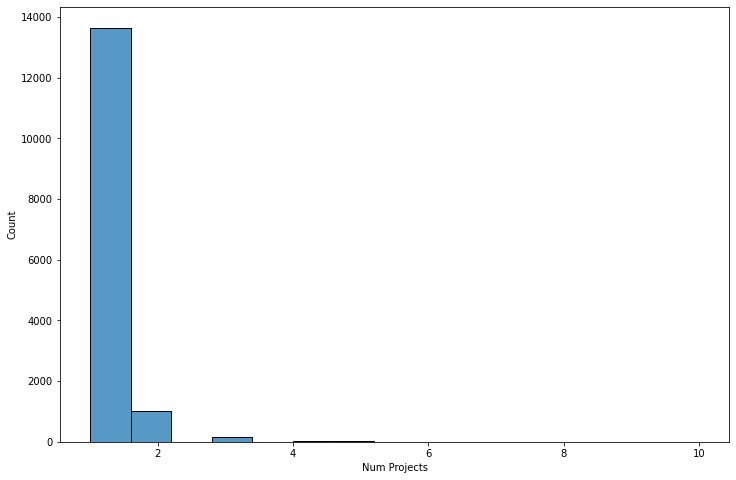

In [201]:
plt.figure(figsize=(12, 8))
sns.histplot(real_user_contribs_ranked['Num Projects'])
plt.show()

In [202]:
real_user_contribs_ranked['Num Projects'].describe()

count    14870.000000
mean         1.102824
std          0.392253
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: Num Projects, dtype: float64

In [203]:
real_user_contribs_ranked.to_csv('real_user_contributions.csv')